# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import GA.MutantAlgo as mutalg

# Поиск оптимального расписания

In [2]:
s = mutalg.solve(250)

Epoch 103 of 250. MAE = 0.23626373626373626,
corrupted!
Epoch 106 of 250. MAE = 0.23076923076923078,
corrupted!
Epoch 113 of 250. MAE = 0.21428571428571427,
corrupted!
Epoch 115 of 250. MAE = 0.21428571428571427,
corrupted!
Epoch 155 of 250. MAE = 0.16483516483516483,
Solution is found!


___
Посмотрим, сколько раз операторы выходят запасными

In [37]:
print('Лишние выходы:', np.sum(s[0].coverage - 8))

Лишние выходы: 58


# Функция для отрисовки расписания по месяцам:

In [40]:
def plot_schedule(sch):
    '''
    Предполагается, что работа начинается с 1 января
    '''
    monthes = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
    days =    [ 31,    28,    31,    30,    31,    30,    31,    31,    30,    31,    30,    31]
    monthes_dict = dict(zip(monthes, days))
    start = 0
    for m, d in monthes_dict.items():
        my_colors = ((1., 1., 0.5, 1.0), (0.0, 0.8, 0.5, 1.0))
        cmap = LinearSegmentedColormap.from_list('my_cmap', my_colors, len(my_colors))
        
        plt.figure(figsize=(20, 7))
        plt.rcParams.update({'font.size': 18})
        
        ax = sns.heatmap(sch.S[:, start:start + d], linewidths=0.5, linecolor='green', cmap = cmap)
        
        plt.xticks(np.arange(1, d+1),np.arange(1, d+1), ha='right')
        plt.yticks(rotation='0')
        plt.xlabel(m)
        plt.ylabel('Операторы')
        plt.title(f'Расписание на {m}')
        
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([0.25, 0.75])
        colorbar.set_ticklabels(['выходной', 'рабочий'])
        
        plt.savefig(f'Plots/{m}.png')
        plt.show()
        
        
        start += d

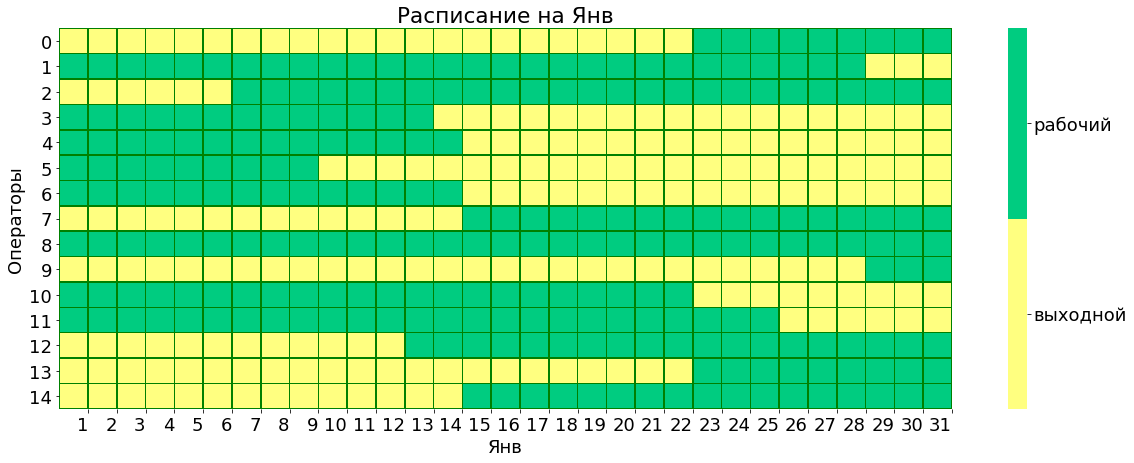

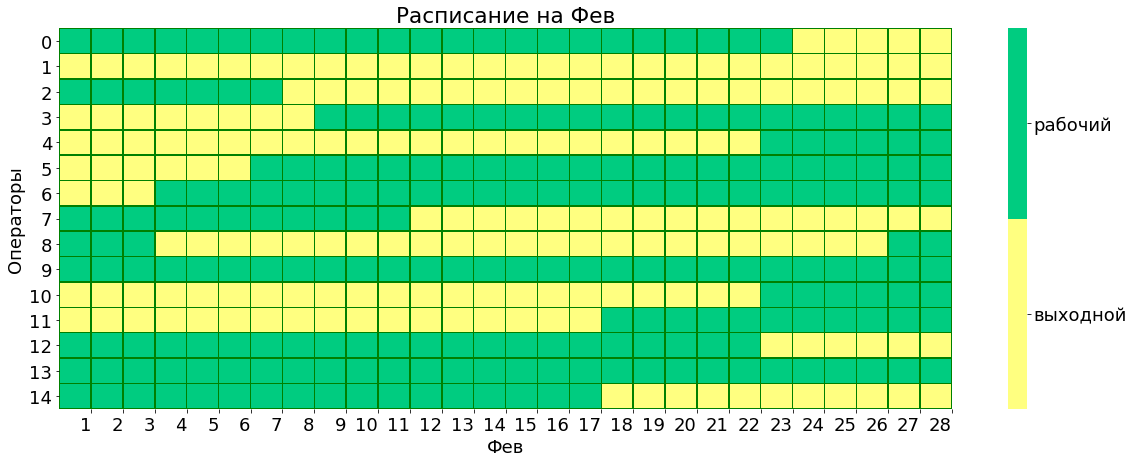

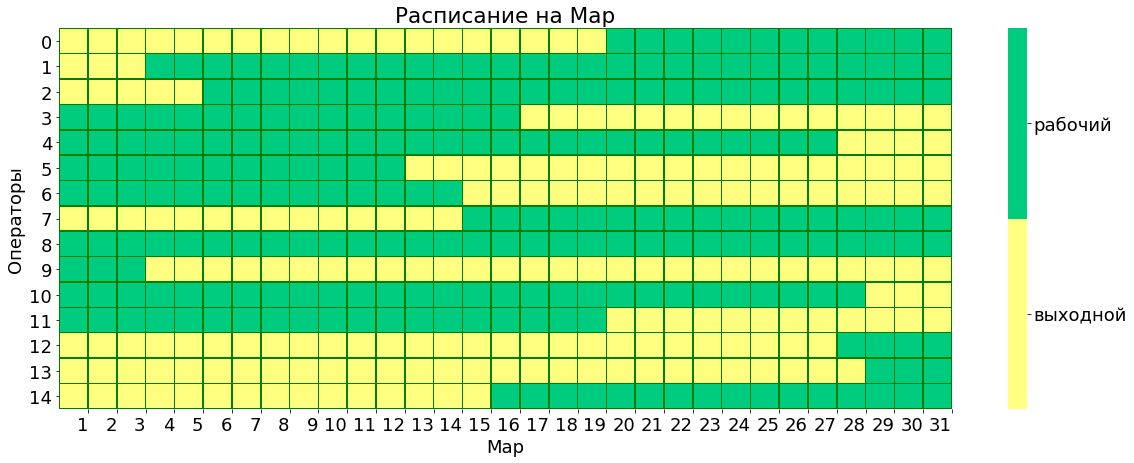

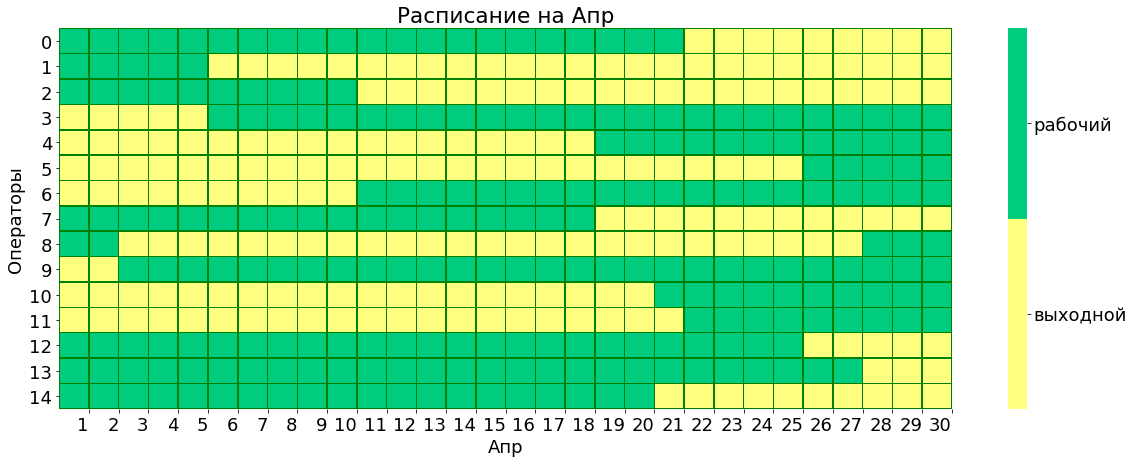

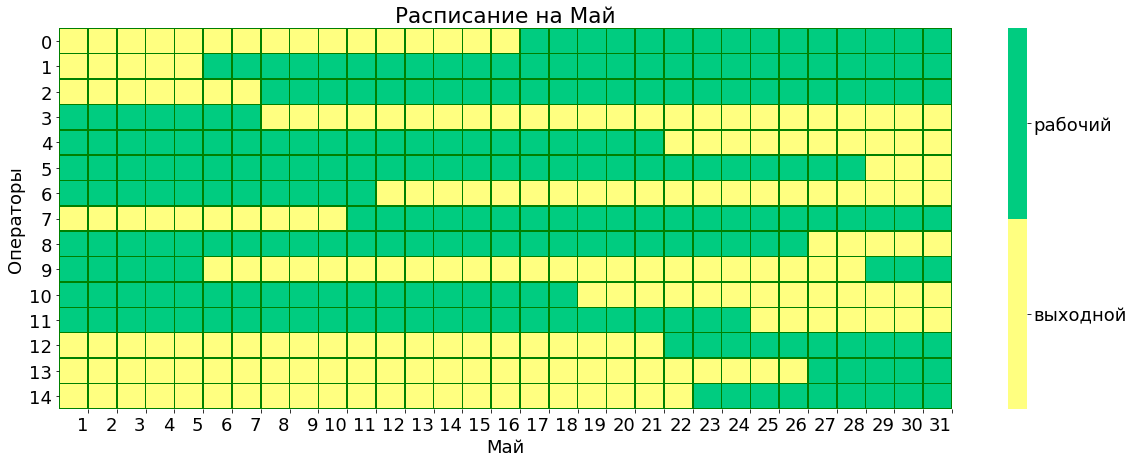

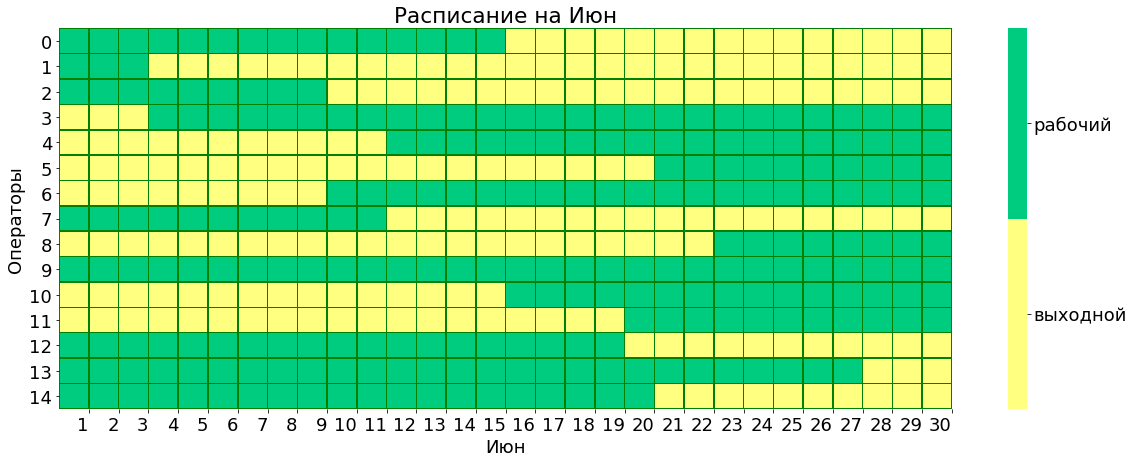

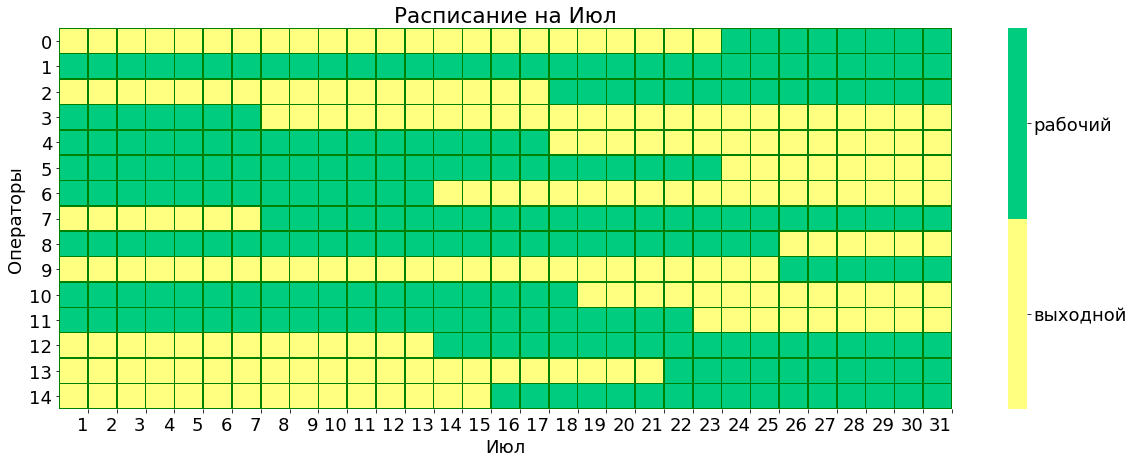

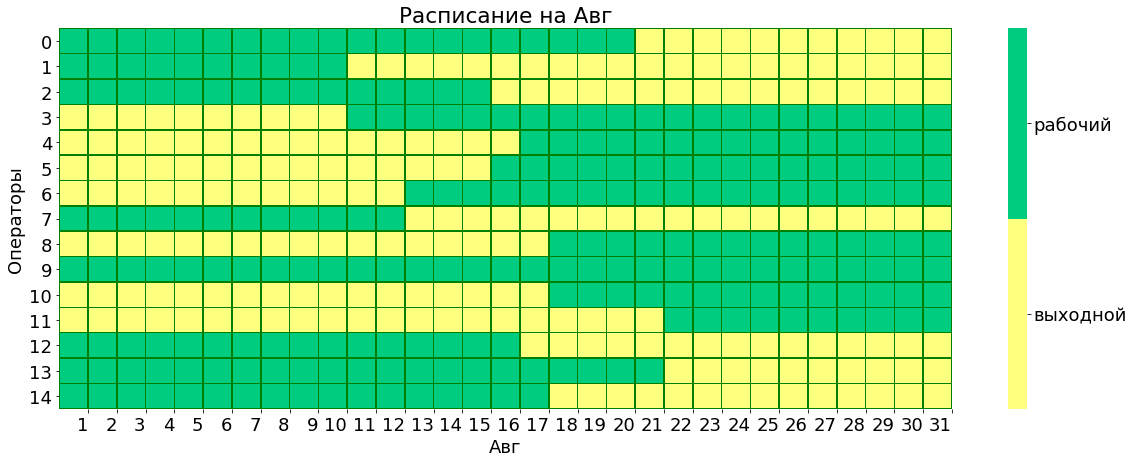

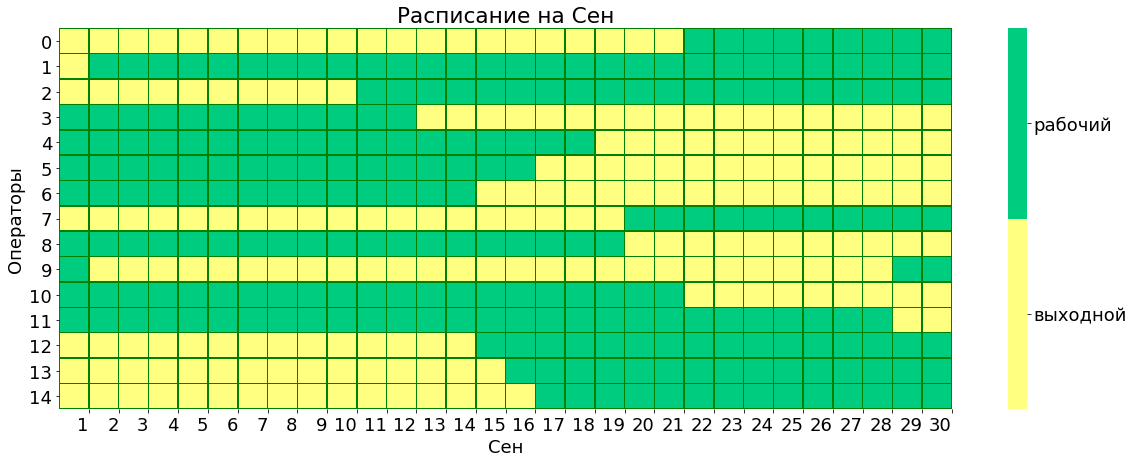

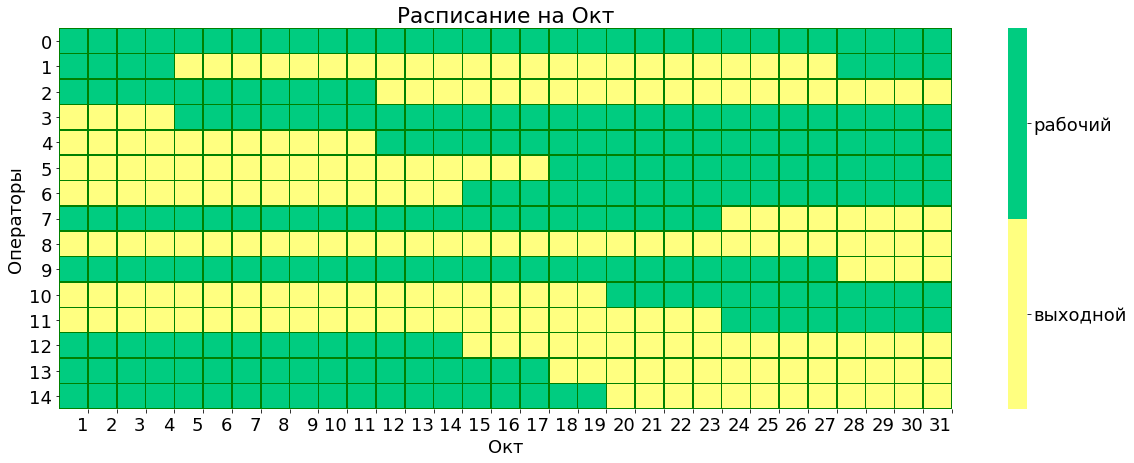

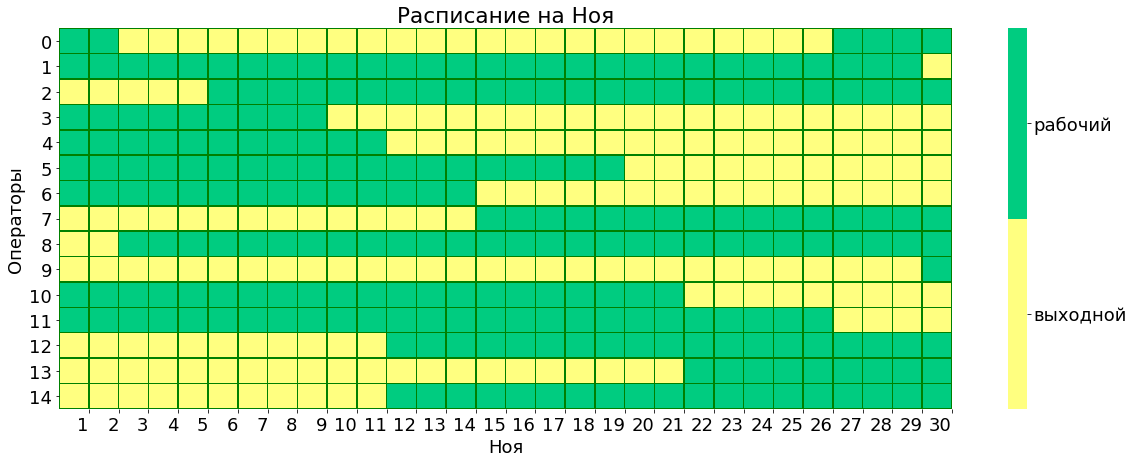

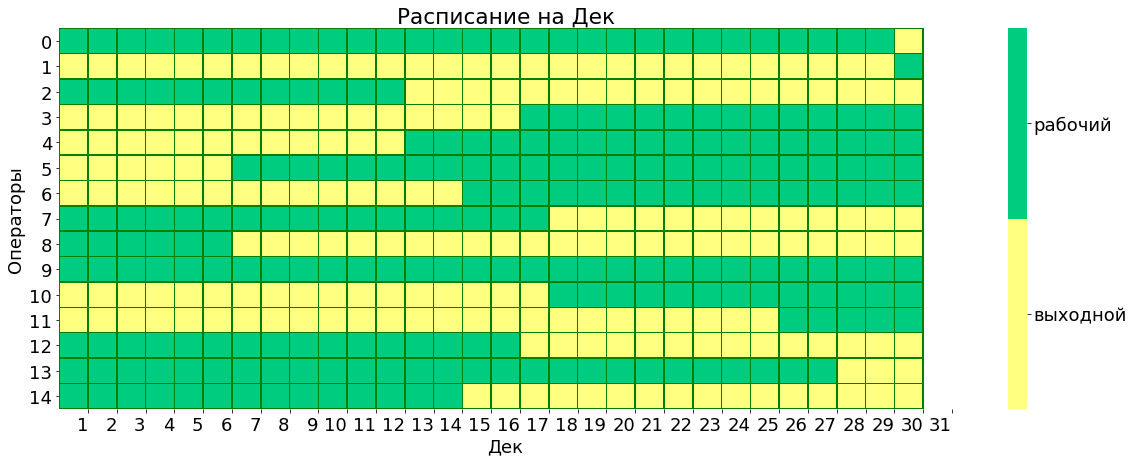

In [41]:
plot_schedule(s[0])

# Распределение числа рабочих дней подряд 

Посмотрим, насколько плохо расписание следует правилу "33 рабочих дня подряд".

In [43]:
from GA.generator import arr2str, get_indexes

In [86]:
def days_count(row, daytype='1'):
    days = []
    inds = get_indexes(row, daytype)
    wd = 0
    for i in range(1, len(inds)):
        if inds[i]-inds[i-1] == 1:
            wd += 1
        else:
            days.append(wd)
            wd = 0
    return days

In [87]:
workdays = []
restdays = []
for r in s[0].S:
    row = arr2str(r)
    workdays += days_count(row, '1')
    restdays += days_count(row, '0')

In [95]:
def plotdays(days, title=''):
    minday = min(days)
    maxday = max(days)
    
    plt.figure(figsize=(10, 7))
    sns.histplot(days, bins=maxday - minday)
    plt.title(title)
    plt.xlabel('Число дней подряд')
    plt.ylabel('Встречаемость')
    plt.xticks(np.arange(minday, maxday), ha='left')
    plt.tick_params(labelsize=12)
    plt.savefig(f'Plots/{title}.png')
    plt.show()

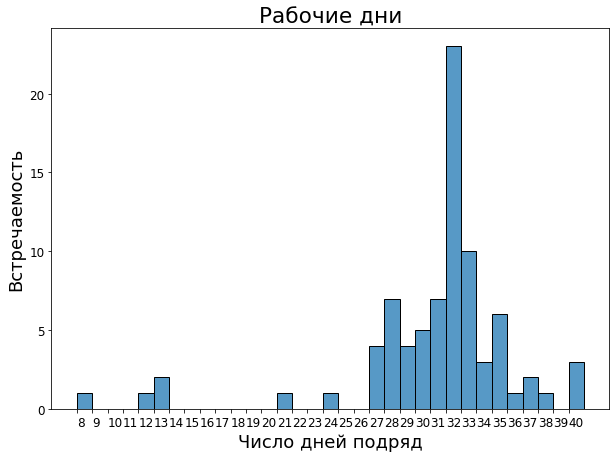

In [96]:
plotdays(workdays, 'Рабочие дни')

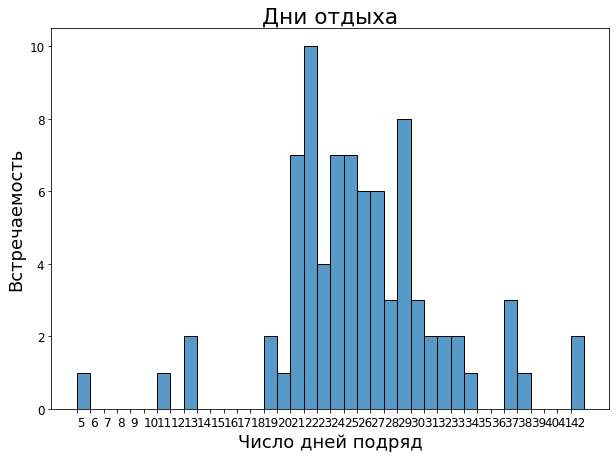

In [97]:
plotdays(restdays, 'Дни отдыха')

Видно, что в большинстве случаев операторы работают по 32 дня, однако есть случаи работы и по 40, что, вероятно, не очень хорошо. Этого можно попробовать избежать, заложив дополнительные условия в алгоритм поиска расписания.
Малое количество рабочих дней подряд встречается только в начале/конце года

С днями отдыха всё лучше. Большое их число можно отнести к отпуску, меньше 19 встречается редко.